In [2]:
using MMEModule
using DataFrames
data = readtable("data/cool.txt",separator = ',',header=true)

,sow,site,yr,age,geneticCode,parity,nwn,SYS
1,100-113,113,2005,18,PIC 1,1,8,113_2005_WNTR
2,100-113,113,2006,18,PIC 1,2,12,113_2006_SPNG
3,100-5,5,2008,15,PIC 2,1,10,5_2008_ATMN
4,1000-5,5,2009,17,PIC 2,1,10,5_2009_SPNG
5,10000-13,13,2004,16,Commercial,1,9,13_2004_WNTR
6,10000-13,13,2004,18,Commercial,2,10,13_2004_SMMR
7,10000-13,13,2004,20,Commercial,3,11,13_2004_ATMN
8,10000-13,13,2005,18,Commercial,4,11,13_2005_SPNG
9,10000-13,13,2005,25,Commercial,5,7,13_2005_ATMN
10,10000-6,6,2012,17,PIC C27,1,12,6_2012_ATMN


In [3]:
data[:age] -= mean(data[:age]);

In [4]:
model  = "nwn = intercept + parity + site + yr + geneticCode + age + sow + SYS"
varRes = 2.97      # starting value for residual variance
mme    = MMEModule.initMME(model,varRes)

MMEModule.covList(mme,"age")

df     = 4.1       # degrees of freedom for prior of variance components
vc     = 0.2635    # starting value for sow variance
MMEModule.setAsRandom(mme,"sow",vc,df)
vc     = 0.28      # starting value for SYS variance
MMEModule.setAsRandom(mme,"SYS",vc,df)

MMEModule.outputSamplesFor(mme,"parity");

In [5]:
resG = MMEModule.getSolG(mme,data);

10 1.4047364810228881e-5


In [6]:
out=MMEModule.sampleMCMCv(50000,mme,df,sol=map(Float64,resG[:,2]),outFreq=5000);

at sample: 5000 with meanVare: 2.8996030012853717 meanVara 0.0 and G0Mean: 0.0
at sample: 10000 with meanVare: 2.9027416773498222 meanVara 0.0 and G0Mean: 0.0
at sample: 15000 with meanVare: 2.8312383692336502 meanVara 0.0 and G0Mean: 0.0
at sample: 20000 with meanVare: 2.818373071556291 meanVara 0.0 and G0Mean: 0.0
at sample: 25000 with meanVare: 2.873903283321289 meanVara 0.0 and G0Mean: 0.0
at sample: 30000 with meanVare: 2.8271451161904357 meanVara 0.0 and G0Mean: 0.0
at sample: 35000 with meanVare: 2.8565263154572853 meanVara 0.0 and G0Mean: 0.0
at sample: 40000 with meanVare: 2.8647292096748043 meanVara 0.0 and G0Mean: 0.0
at sample: 45000 with meanVare: 2.897224644727157 meanVara 0.0 and G0Mean: 0.0
at sample: 50000 with meanVare: 2.883170443751336 meanVara 0.0 and G0Mean: 0.0


In [7]:
keys(out)

Base.KeyIterator for a Dict{Any,Any} with 5 entries. Keys:
  "posteriorMeanLocationParms"
  "MCMCSamples for variance of :sow"
  "MCMCSamples for variance of :SYS"
  "MCMCSamples: parity"
  "MCMCSamples for residual variance"

In [8]:
y1=out["MCMCSamples for variance of :sow"];
y2=out["MCMCSamples for variance of :SYS"];
y3=out["MCMCSamples for residual variance"];

In [9]:
using Gadfly

INFO: Recompiling stale cache file /Users/haocheng/.julia/lib/v0.4/FixedSizeArrays.ji for module FixedSizeArrays.
INFO: Recompiling stale cache file /Users/haocheng/.julia/lib/v0.4/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /Users/haocheng/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /Users/haocheng/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /Users/haocheng/.julia/lib/v0.4/Compose.ji for module Compose.
INFO: Recompiling stale cache file /Users/haocheng/.julia/lib/v0.4/Contour.ji for module Contour.


In [11]:
mean(y1[100:end])

0.13253948211439254

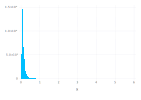

In [12]:
plot(x=y1[250:end],Geom.histogram)

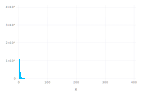

In [13]:
plot(x=y3[100:end],Geom.histogram)

In [14]:
resParity = out["MCMCSamples: parity"];

In [15]:
parityMeans = mean(resParity,1)

1x5 Array{Float64,2}:
 34.1791  43.902  53.7027  343.408  370.105

In [16]:
diffParity = resParity[:,2:end] .- resParity[:,1];

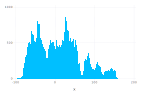

In [17]:
plot(x=diffParity[100:end,1],Geom.histogram)

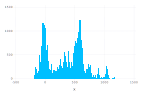

In [20]:
plot(x=diffParity[100:end,4],Geom.histogram)